# Practical Machine Learning for Physicists
## Week 4 Exercise - Part 1


### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
import keras
import keras.layers
import keras.datasets.mnist

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2023-02-22 11:52:36.524694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 11:52:36.886274: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-22 11:52:36.990779: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-22 11:52:36.990824: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

2.11.0


Load MNIST data, re-scale and check the shape of the data:

In [2]:
# load data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# re-scale inputs
train_images=train_images/255.0
test_images=test_images/255.0

# check shape of datasets
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("First label:",train_labels[0])
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

image_x = len(train_images[0,:,0])
image_y = len(train_images[0,0,:])

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
First label: 5
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


Define and compile model, using a single convolutional layer. From testing, I found that a kernel size of 3x3, with the reLU activation function, worked best for the convolutional layer. I reduced the size of the first dense layer from 128 to 30, which only slightly reduced the validation accuracy but increased the execution speed. The number of kernels impacted the performance the most (apart from using reLU over sigmoid for the activation function) so I systematically increased this from 4 to 32 in order to find the maximum performance. The performance increased gradually, with the highest performance achieved at 48 kernels, with little to no reduction in execution time. It would be beneficial to test higher numbers of kernels to observe any leveling-out or reduction in performance. 

In [3]:
def train_model(kernel):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(kernel, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(30, activation = 'relu'))
    model.add(keras.layers.Dense(15))

    model.summary()
    
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

    return history


4


2023-02-22 11:52:41.929533: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-22 11:52:41.932030: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-22 11:52:41.932128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (penguin): /proc/driver/nvidia/version does not exist
2023-02-22 11:52:42.004724: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 676)               0         
                                                                 
 dense (Dense)               (None, 30)                20310     
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
Total params: 20,815
Trainable params: 20,815
Non-trainable params: 0
____________________________________________________

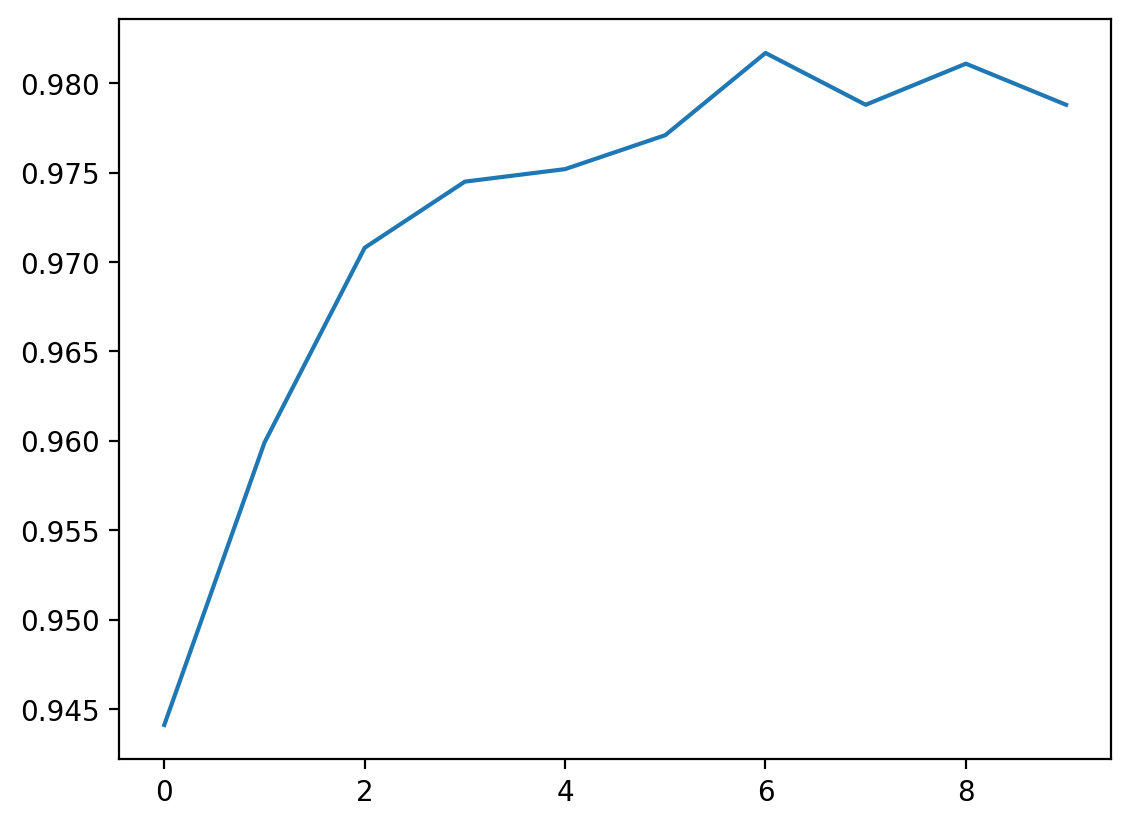

In [4]:
#kernels = np.linspace(4, 48, 12)
kernels = 4
print(kernels)

fig,ax = plt.subplots()
history = train_model(kernels)
#for kernel in range(len(kernels)):
#    history = train_model(kernels[kernel])
ax.plot(history.history['val_accuracy'])

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

A very high accuracy was achieved with only two convolutional layers, each with 32 and 64 kernels.

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(15))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [6]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1408 - accuracy: 0.9563 - val_loss: 0.0505 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0354 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0326 - val_accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0323 - val_accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0344 - val_accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.0328 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0390 -